# import

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from os import path

In [3]:
import taproc as tp
from taproc.pre_processing import *
from taproc.dataset import *
from taproc.learner import *
from taproc.feature import *
from taproc.interpretation import *

In [4]:
import shap

# read file

In [5]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [6]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [7]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# train test split from sklearn

In [8]:
ds = TBDataset.from_SklearnSplit(app_train_proc, y)

# baseline model

In [9]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':30,
    'learning_rate':0.1,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [10]:
learner = LGBLearner()

In [11]:
learner.load()

# dendrogram

In [12]:
ddg = Dendogram.from_df(ds.x_trn)

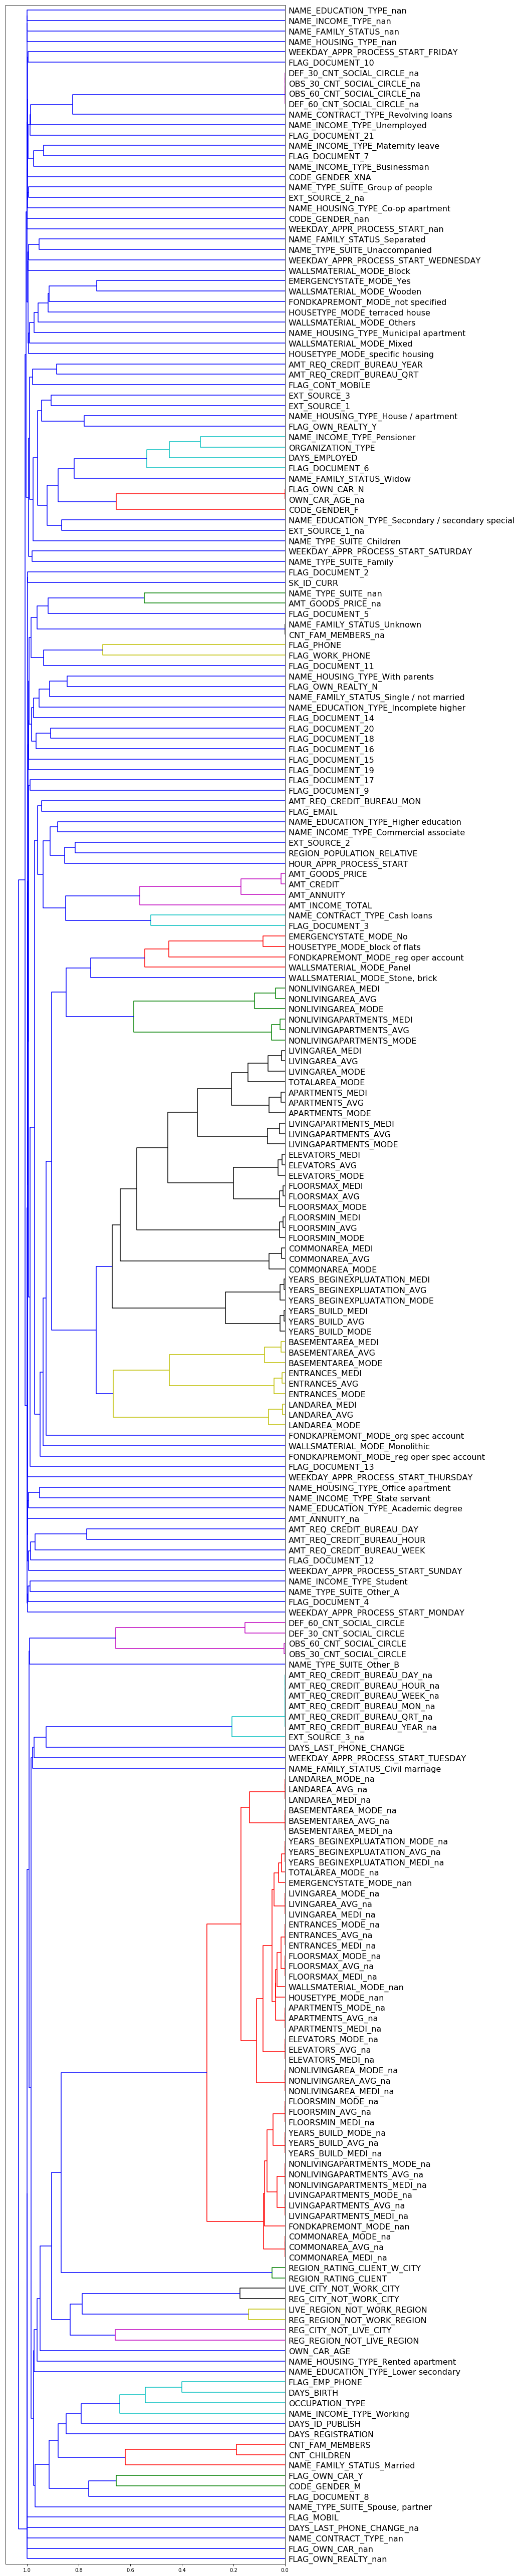

In [13]:
ddg.plot()

In [14]:
ddg.result.head(10)

col1                             col2  dist
0                   OWN_CAR_AGE_na                   FLAG_OWN_CAR_N   0.0
1   YEARS_BEGINEXPLUATATION_AVG_na  YEARS_BEGINEXPLUATATION_MODE_na   0.0
2  YEARS_BEGINEXPLUATATION_MEDI_na                              ---   0.0
3                 FLOORSMAX_AVG_na                FLOORSMAX_MODE_na   0.0
4                FLOORSMAX_MEDI_na                              ---   0.0
5                 ENTRANCES_AVG_na                ENTRANCES_MODE_na   0.0
6                ENTRANCES_MEDI_na                              ---   0.0
7                APARTMENTS_AVG_na               APARTMENTS_MODE_na   0.0
8               APARTMENTS_MEDI_na                              ---   0.0
9                LIVINGAREA_AVG_na               LIVINGAREA_MODE_na   0.0

In [16]:
cluster = [['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
     ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
     ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
     ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
     ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI'],
     ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE','TOTALAREA_MODE'],
     ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
     ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
     ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
     ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
     ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
     ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
     ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
     ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
     ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
     ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
     ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
     ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
     ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
     ['LANDAREA_AVG_na', 'LANDAREA_MODE_na','LANDAREA_MEDI_na'],
     ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
     ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
      'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
      'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
     ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
     ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
     ['YEARS_BEGINEXPLUATATION_AVG_na', 'YEARS_BEGINEXPLUATATION_MODE_na', 
      'YEARS_BEGINEXPLUATATION_MEDI_na', 'TOTALAREA_MODE_na', 'EMERGENCYSTATE_MODE_nan'],
     ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
     ['ENTRANCES_AVG_na', 'ENTRANCES_MODE_na', 'ENTRANCES_MEDI_na',
      'FLOORSMAX_AVG_na', 'FLOORSMAX_MODE_na', 'FLOORSMAX_MEDI_na', 'WALLSMATERIAL_MODE_nan'],
     ['APARTMENTS_AVG_na', 'APARTMENTS_MODE_na', 'APARTMENTS_MEDI_na', 'HOUSETYPE_MODE_nan'],
     ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
     ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
     ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
     ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
     ['NONLIVINGAPARTMENTS_AVG_na', 'NONLIVINGAPARTMENTS_MODE_na', 'NONLIVINGAPARTMENTS_MEDI_na'],
     ['LIVINGAPARTMENTS_AVG_na', 'LIVINGAPARTMENTS_MODE_na', 'LIVINGAPARTMENTS_MEDI_na'],
     ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
     ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

In [17]:
group_cols = ddg.group_cols(cluster)

In [12]:
group_cols = [['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
 ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'TOTALAREA_MODE'],
 ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
 ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
 ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
 ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
 ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
 ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
 ['YEARS_BEGINEXPLUATATION_AVG_na',
  'YEARS_BEGINEXPLUATATION_MODE_na',
  'YEARS_BEGINEXPLUATATION_MEDI_na',
  'TOTALAREA_MODE_na',
  'EMERGENCYSTATE_MODE_nan'],
 ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
 ['ENTRANCES_AVG_na',
  'ENTRANCES_MODE_na',
  'ENTRANCES_MEDI_na',
  'FLOORSMAX_AVG_na',
  'FLOORSMAX_MODE_na',
  'FLOORSMAX_MEDI_na',
  'WALLSMATERIAL_MODE_nan'],
 ['APARTMENTS_AVG_na',
  'APARTMENTS_MODE_na',
  'APARTMENTS_MEDI_na',
  'HOUSETYPE_MODE_nan'],
 ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
 ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
 ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
 ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
 ['NONLIVINGAPARTMENTS_AVG_na',
  'NONLIVINGAPARTMENTS_MODE_na',
  'NONLIVINGAPARTMENTS_MEDI_na'],
 ['LIVINGAPARTMENTS_AVG_na',
  'LIVINGAPARTMENTS_MODE_na',
  'LIVINGAPARTMENTS_MEDI_na'],
 ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 'SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY_na',
 'AMT_GOODS_PRICE_na',
 'OWN_CAR_AGE_na',
 'CNT_FAM_MEMBERS_na',
 'EXT_SOURCE_1_na',
 'EXT_SOURCE_2_na',
 'EXT_SOURCE_3_na',
 'OBS_30_CNT_SOCIAL_CIRCLE_na',
 'DEF_30_CNT_SOCIAL_CIRCLE_na',
 'OBS_60_CNT_SOCIAL_CIRCLE_na',
 'DEF_60_CNT_SOCIAL_CIRCLE_na',
 'DAYS_LAST_PHONE_CHANGE_na',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_CONTRACT_TYPE_nan',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'CODE_GENDER_nan',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_CAR_nan',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'FLAG_OWN_REALTY_nan',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_TYPE_SUITE_nan',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_INCOME_TYPE_nan',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_EDUCATION_TYPE_nan',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_FAMILY_STATUS_nan',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'NAME_HOUSING_TYPE_nan',
 'WEEKDAY_APPR_PROCESS_START_FRIDAY',
 'WEEKDAY_APPR_PROCESS_START_MONDAY',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
 'WEEKDAY_APPR_PROCESS_START_nan',
 'FONDKAPREMONT_MODE_not specified',
 'FONDKAPREMONT_MODE_org spec account',
 'FONDKAPREMONT_MODE_reg oper account',
 'FONDKAPREMONT_MODE_reg oper spec account',
 'FONDKAPREMONT_MODE_nan',
 'HOUSETYPE_MODE_specific housing',
 'HOUSETYPE_MODE_terraced house',
 'WALLSMATERIAL_MODE_Block',
 'WALLSMATERIAL_MODE_Mixed',
 'WALLSMATERIAL_MODE_Monolithic',
 'WALLSMATERIAL_MODE_Others',
 'WALLSMATERIAL_MODE_Panel',
 'WALLSMATERIAL_MODE_Stone, brick',
 'WALLSMATERIAL_MODE_Wooden',
 'EMERGENCYSTATE_MODE_Yes']

# feature importance

In [20]:
impt = Importance.from_Learner(learner, ds, group_cols)

In [21]:
impt.I[:5]

Feature  Importance
62                                EXT_SOURCE_3    0.070686
61                                EXT_SOURCE_2    0.061823
60                                EXT_SOURCE_1    0.010314
40                                  DAYS_BIRTH    0.005867
1   AMT_GOODS_PRICE & AMT_CREDIT & AMT_ANNUITY    0.004631

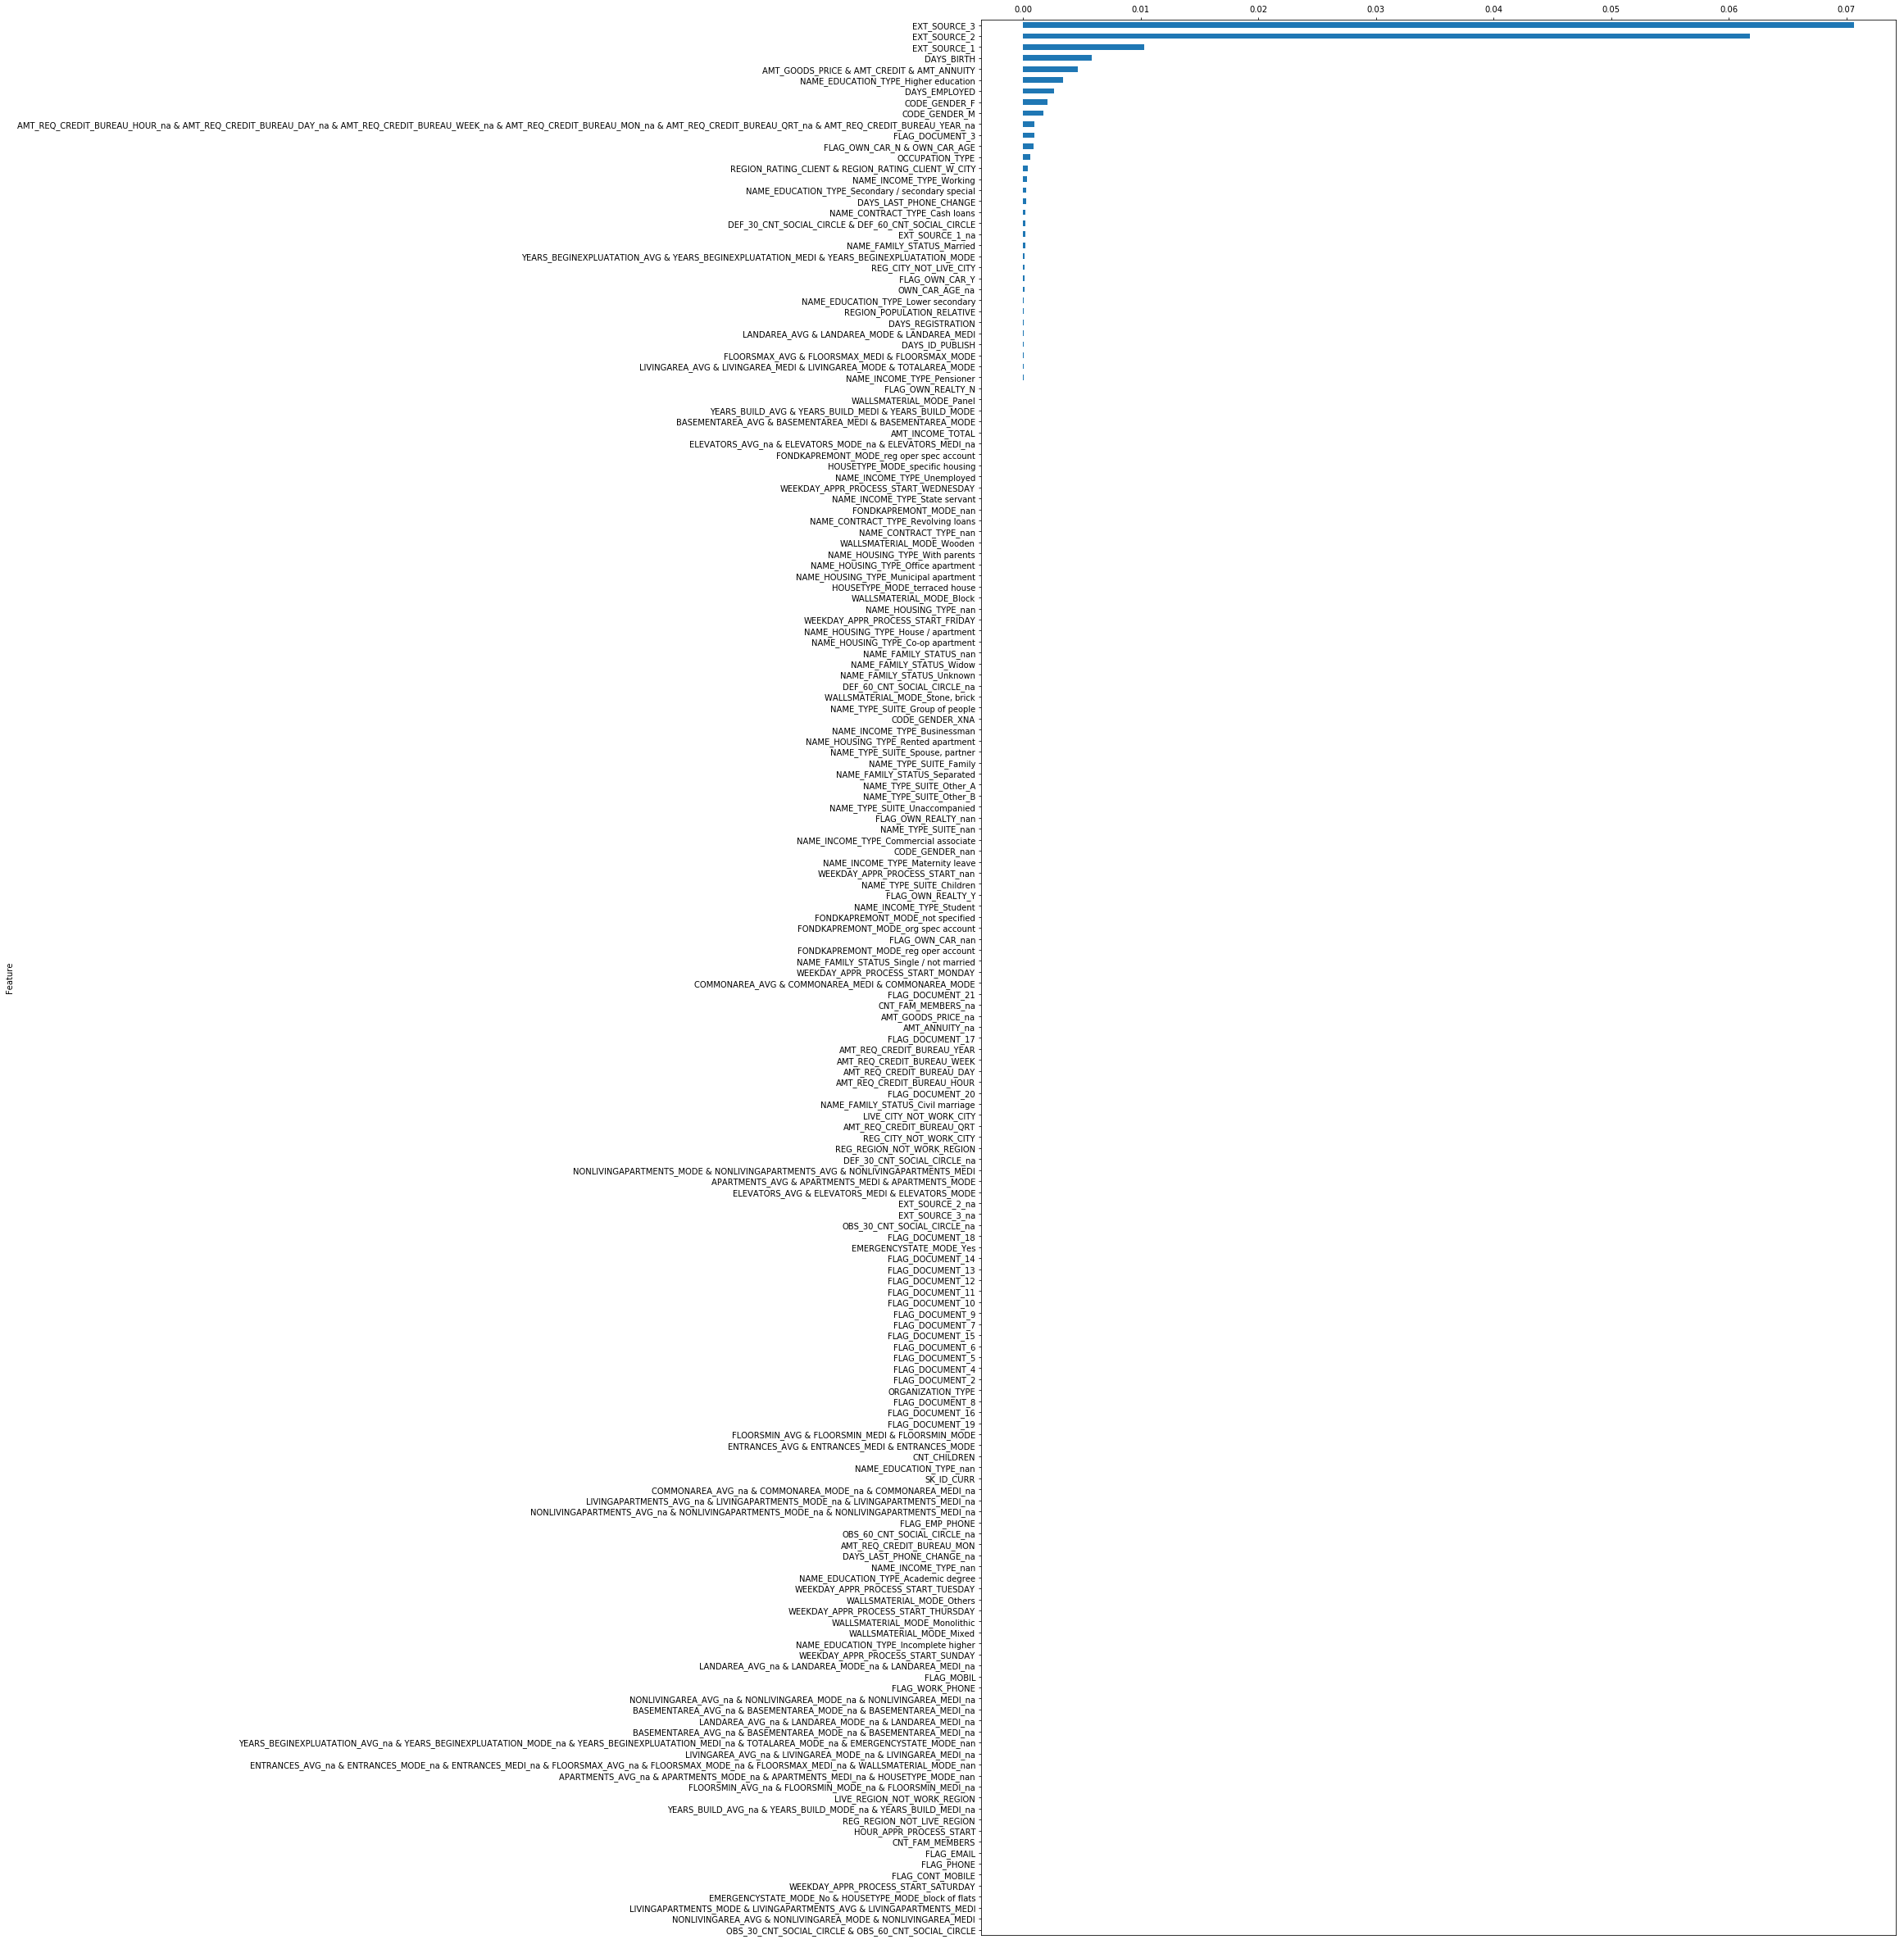

In [23]:
impt.plot()

In [24]:
impt.top(27)

[['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['EXT_SOURCE_1'],
 ['DAYS_BIRTH'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['DAYS_EMPLOYED'],
 ['CODE_GENDER_F'],
 ['CODE_GENDER_M'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['FLAG_DOCUMENT_3'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['OCCUPATION_TYPE'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['NAME_INCOME_TYPE_Working'],
 ['NAME_EDUCATION_TYPE_Secondary / secondary special'],
 ['DAYS_LAST_PHONE_CHANGE'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['EXT_SOURCE_1_na'],
 ['NAME_FAMILY_STATUS_Married'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['REG_CITY_NOT_LIVE_CITY'],
 ['FLAG_OWN_CAR_Y'],
 ['OWN_C

In [16]:
impt_ft = [['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['EXT_SOURCE_1'],
 ['DAYS_BIRTH'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['DAYS_EMPLOYED'],
 ['CODE_GENDER_F'],
 ['CODE_GENDER_M'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['FLAG_DOCUMENT_3'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['OCCUPATION_TYPE'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['NAME_INCOME_TYPE_Working'],
 ['NAME_EDUCATION_TYPE_Secondary / secondary special'],
 ['DAYS_LAST_PHONE_CHANGE'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['EXT_SOURCE_1_na'],
 ['NAME_FAMILY_STATUS_Married'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['REG_CITY_NOT_LIVE_CITY'],
 ['FLAG_OWN_CAR_Y'],
 ['OWN_CAR_AGE_na'],
 ['NAME_EDUCATION_TYPE_Lower secondary'],
 ['REGION_POPULATION_RELATIVE']]

In [17]:
keep_ft = flat_list(impt_ft)

In [18]:
ds.keep(keep_ft)

In [19]:
learner.fit(params, 
            *ds.trn_n_val(),
            early_stopping_rounds=50,
            verbose_eval=100)

Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[30]	training's binary_logloss: 0.25439	valid_1's binary_logloss: 0.2578


# partial dependence

In [32]:
ds.x_val.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_EDUCATION_TYPE_Higher education', 'DAYS_EMPLOYED',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'AMT_REQ_CREDIT_BUREAU_HOUR_na',
       'AMT_REQ_CREDIT_BUREAU_DAY_na', 'AMT_REQ_CREDIT_BUREAU_WEEK_na',
       'AMT_REQ_CREDIT_BUREAU_MON_na', 'AMT_REQ_CREDIT_BUREAU_QRT_na',
       'AMT_REQ_CREDIT_BUREAU_YEAR_na', 'FLAG_DOCUMENT_3', 'FLAG_OWN_CAR_N',
       'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'DAYS_LAST_PHONE_CHANGE', 'NAME_CONTRACT_TYPE_Cash loans',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'EXT_SOURCE_1_na', 'NAME_FAMILY_STATUS_Married',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_MODE', 'REG_CITY_NOT_LIVE_CITY',
       

In [28]:
pdpd = PartialDependence.from_Learner(learner, ds)

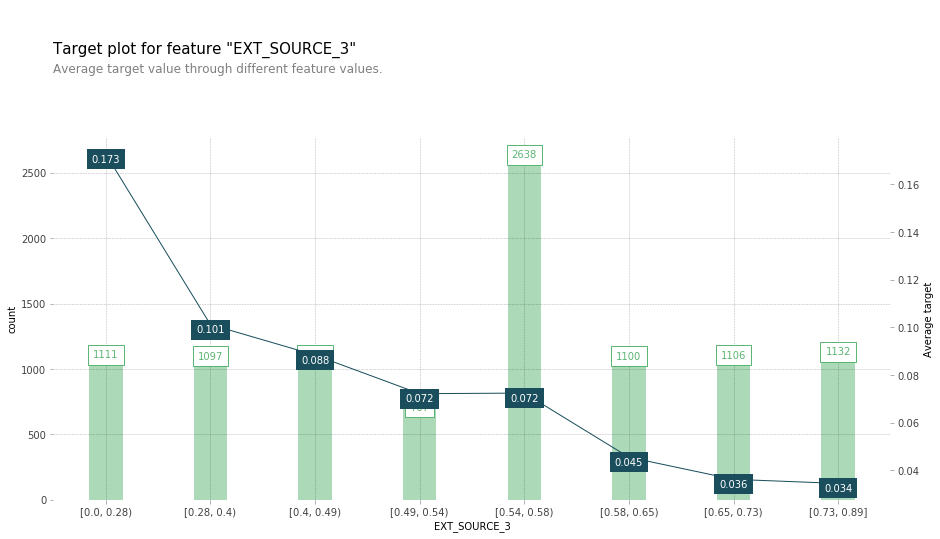

In [33]:
pdpd.info_target('EXT_SOURCE_3')

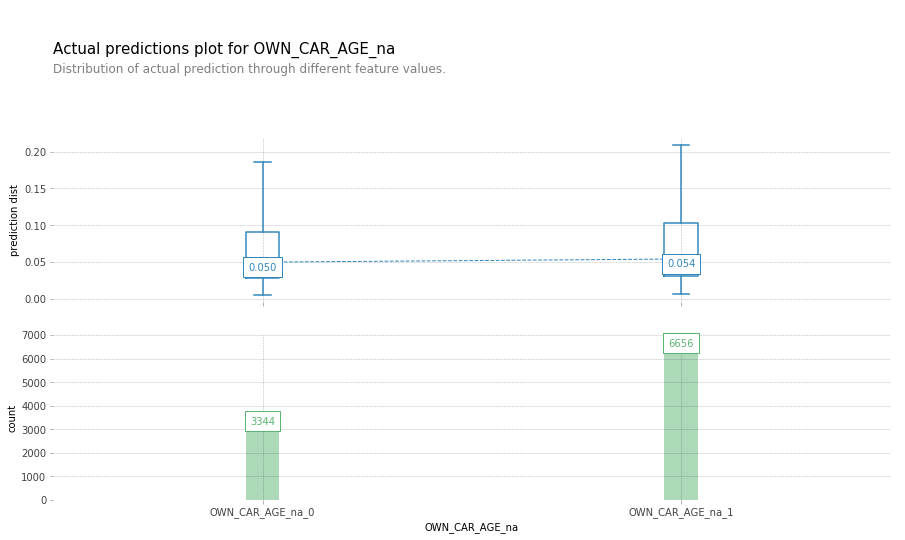

In [34]:
pdpd.info_actual('OWN_CAR_AGE_na')

# feature engeering

In [ ]:
add and lambda

# explainer

In [168]:
class SHAP:
    def __init__(self, explainer, shap_values, df, features):
        shap.initjs()
        self.explainer = explainer
        self.shap_values = shap_values
        self.df, self.features = df, features        
        
    @classmethod
    def from_Tree(cls, learner, ds, sample = 10000):
        df = ds.x_trn.sample(sample).astype(np.float32)
        explainer = shap.TreeExplainer(learner.md)
        shap_values = explainer.shap_values(ds_sample)
        features = df.columns
        return cls(explainer, shap_values, df, features)    
    
    def force_plot_one(self, loc):
        return shap.force_plot(self.explainer.expected_value, self.shap_values[loc], features = self.features)
    
    def force_plot_many(self, loc, sample = 10000):
        return shap.force_plot(self.explainer.expected_value, self.shap_values[:loc,:], features = self.features)
    
    def summary_plot(self, plot_type = 'violin', alpha=0.01):
        """violin, layered_violin, dot"""
        return shap.summary_plot(self.shap_values, self.df, alpha=alpha, plot_type = plot_type)
        
    def importance_plot(self):
        return shap.summary_plot(self.shap_values, self.df, plot_type="bar")
        
    def interaction_plot(self, sample = 100):
        shap_interaction_values = explainer.shap_interaction_values(self.df.sample(sample))
        return shap.summary_plot(shap_interaction_values, features = self.features)
    
    def dependence_plot(self, col1, col2, alpha = 0.3, dot_size=50):
        return shap.dependence_plot(ind = col1, interaction_index = col2, 
                                     shap_values = self.shap_values, features = self.features, 
                                     alpha = alpha, dot_size=dot_size)

In [169]:
Shap = SHAP.from_Tree(learner, ds)

In [170]:
Shap.force_plot_one(3)

In [72]:
ds_sample = ds.x_trn.sample(10000)

In [24]:
loc = 1

In [73]:
explainer = shap.TreeExplainer(learner.md)
shap_values = explainer.shap_values(ds_sample)

In [149]:
shap.force_plot(explainer.expected_value, shap_values[0,:], 
                features = ds_sample.columns)

In [138]:
shap.force_plot(explainer.expected_value, 
                shap_values[:1000,:], 
                ds_sample.iloc[:1000,:])

#plot_cmap="PkYg"

In [ ]:
"violin", dot, layered_violin

In [ ]:
shap.summary_plot(shap_values, ds_sample.astype(np.float), alpha=0.01, 
                  plot_type="violin", dot, layered_violin)

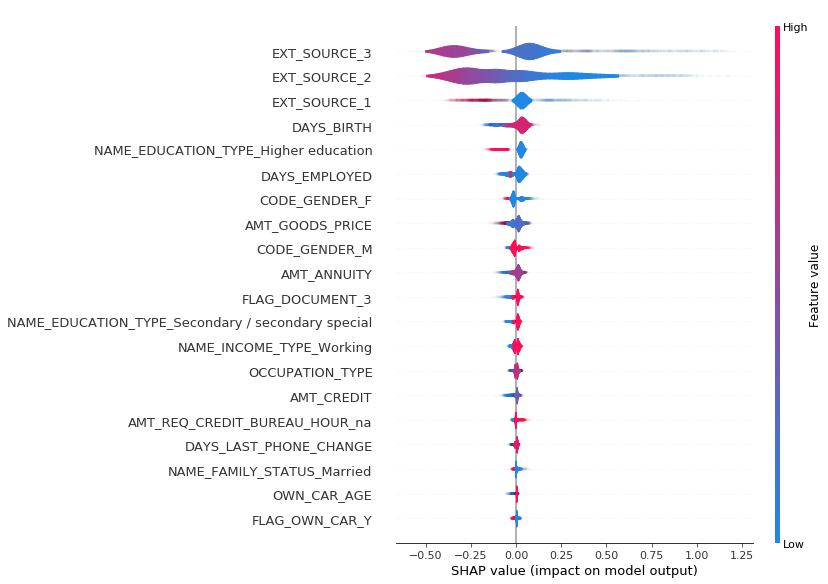

In [142]:
shap.summary_plot(shap_values, ds_sample.astype(np.float), alpha=0.01, 
                  plot_type="violin", color="hot")

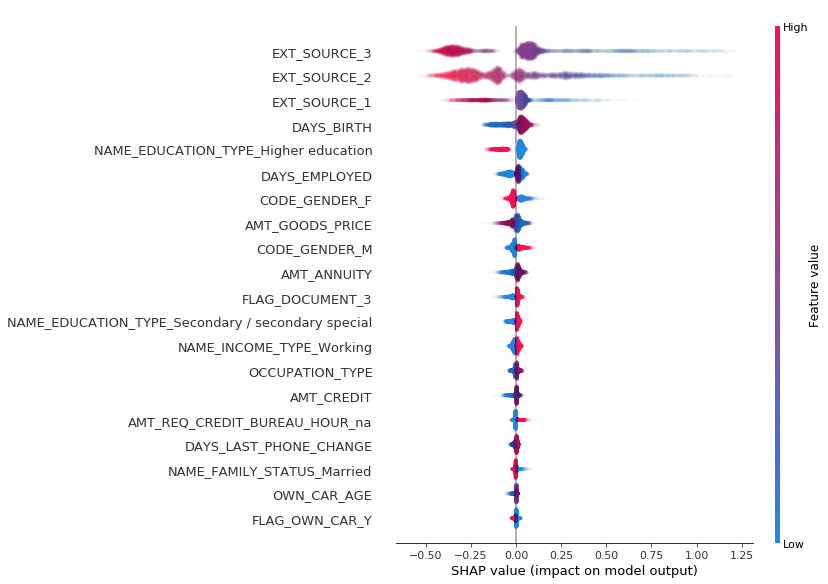

In [143]:
shap.summary_plot(shap_values, ds_sample.astype(np.float), alpha=0.01, 
                  plot_type="dot", color="hot")

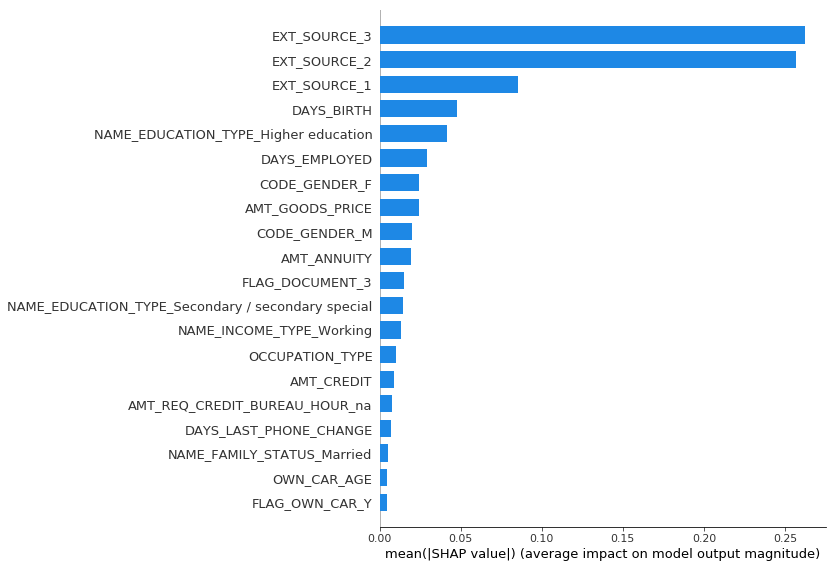

In [147]:
shap.summary_plot(shap_values, ds_sample.columns, plot_type="bar")

In [116]:
shap_interaction_values = explainer.shap_interaction_values(ds_sample.astype(np.float).iloc[:10,:])

In [109]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X.iloc[:20,:])

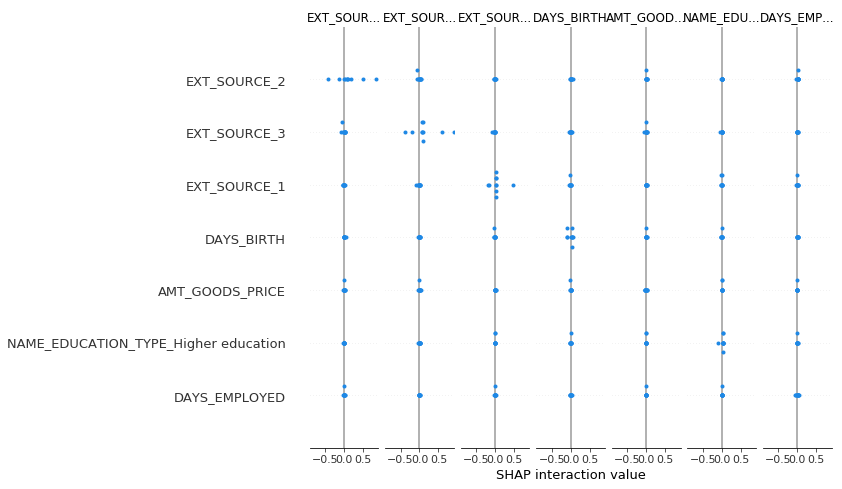

In [146]:
shap.summary_plot(shap_interaction_values, ds_sample.columns)

In [ ]:
shap.TreeExplainer

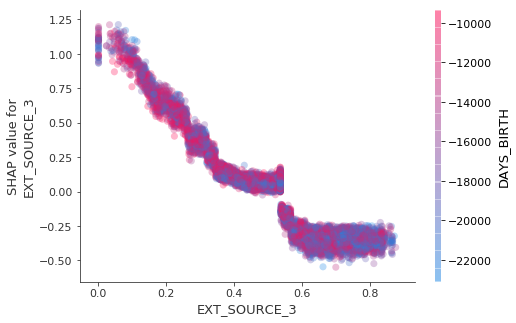

In [99]:
shap.dependence_plot(ind = 'EXT_SOURCE_3',
                     interaction_index = 'DAYS_BIRTH', 
                     shap_values = shap_values, 
                     features = ds_sample, 
                     alpha = 0.3, dot_size=50)

In [64]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [70]:
X.shape

(32561, 12)

In [69]:
X_display.shape

(32561, 12)

In [65]:
params = {
    "max_bin": 512,
    "learning_rate": 0.5,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[61]	valid_0's binary_logloss: 0.280151


In [66]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [67]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])